Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем).

Пример итоговой таблицы:
    
    product_id  quantity    name             date
    
0       56          2         Anatoly_Karpov   2020-12-30

1       7           2         Anatoly_Karpov   2020-12-30

2       9           3         Anatoly_Karpov   2020-12-30

Например:

1. Имеются следующие данные:
    
> df_1

    product_id  quantity    name               date
    
0       56          2         Anatoly_Karpov     2020-12-30

1       7           2         Anatoly_Karpov     2020-12-30

2       9           3         Anatoly_Karpov     2020-12-30

> df_2

    product_id  quantity    name               date
    
0       4           2         Кatya_Skriptsova   2020-12-30

1       71          1         Кatya_Skriptsova   2020-12-31

2. Соединяем, передав на вход список датафреймов, которые нужно объединить.


    product_id  quantity    name                date
    
0       56          2         Anatoly_Karpov      2020-12-30

1       7           2         Anatoly_Karpov      2020-12-30

2       9           3         Anatoly_Karpov      2020-12-30

0       4           2         Кatya_Skriptsova    2020-12-30

1       71          1         Кatya_Skriptsova    2020-12-31

#### В качестве ответа укажите сумму по колонке quantity.

In [1]:
import os
import pandas as pd

In [2]:
tree = os.walk('data')

In [3]:
data_files = []

target_file = 'data.csv'

for item in tree:
    files = item[-1]
    
    if len(files) > 0 and target_file in files:
        path = os.path.join(item[0], target_file)
        data_files.append(path)

In [4]:
data_files

['data\\2020-12-03\\Alexey_Smirnov\\data.csv',
 'data\\2020-12-03\\Anton_Petrov\\data.csv',
 'data\\2020-12-03\\Kirill_Petrov\\data.csv',
 'data\\2020-12-03\\Petr_Fedorov\\data.csv',
 'data\\2020-12-03\\Vasiliy_Ivanov\\data.csv',
 'data\\2020-12-03\\Vasiliy_Petrov\\data.csv',
 'data\\2020-12-04\\Alexey_Smirnov\\data.csv',
 'data\\2020-12-04\\Kirill_Fedorov\\data.csv',
 'data\\2020-12-04\\Petr_Fedorov\\data.csv',
 'data\\2020-12-04\\Petr_Ivanov\\data.csv',
 'data\\2020-12-04\\Petr_Smirnov\\data.csv',
 'data\\2020-12-04\\Rostislav_Fedorov\\data.csv',
 'data\\2020-12-04\\Rostislav_Ivanov\\data.csv',
 'data\\2020-12-04\\Rostislav_Smirnov\\data.csv',
 'data\\2020-12-04\\Vasiliy_Ivanov\\data.csv',
 'data\\2020-12-05\\Alexey_Fedorov\\data.csv',
 'data\\2020-12-05\\Alexey_Petrov\\data.csv',
 'data\\2020-12-05\\Kirill_Smirnov\\data.csv',
 'data\\2020-12-05\\Petr_Ivanov\\data.csv',
 'data\\2020-12-05\\Petr_Smirnov\\data.csv',
 'data\\2020-12-05\\Rostislav_Smirnov\\data.csv',
 'data\\2020-12-06\\

In [5]:
data_files_df = []


for path in data_files:
    df = pd.read_csv(path, index_col=0)
    date, name = path.split('\\')[1:3]
    df['name'] = name
    df['date'] = date
    data_files_df.append(df)

In [6]:
data_files_df[0].head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03


In [7]:
data = pd.concat(data_files_df, ignore_index=True)

In [8]:
data.head(10)

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
5,94,4,Alexey_Smirnov,2020-12-03
6,56,5,Anton_Petrov,2020-12-03
7,27,3,Anton_Petrov,2020-12-03
8,82,1,Anton_Petrov,2020-12-03
9,61,1,Anton_Petrov,2020-12-03


In [9]:
data.quantity.sum()

480

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке. Например:

Anatoly_Karpov, Nekto_Ktotovich, Lena_Uhanova, Ignat, Sasha_Tokarev

In [104]:
quantities = data.groupby('name').quantity.sum()

In [105]:
max_quantities = quantities.max()

In [106]:
quantities.loc[quantities == max_quantities].index.sort_values()

Index(['Alexey_Smirnov', 'Petr_Smirnov'], dtype='object', name='name')

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:

по оси x – идентификаторы товаров (product_id) 

по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)

Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.

In [112]:
sold = data.groupby('product_id', as_index=False).quantity.sum()

In [113]:
sold = sold.sort_values('quantity', ascending=False).head(10)

In [114]:
sold

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='product_id', ylabel='quantity'>

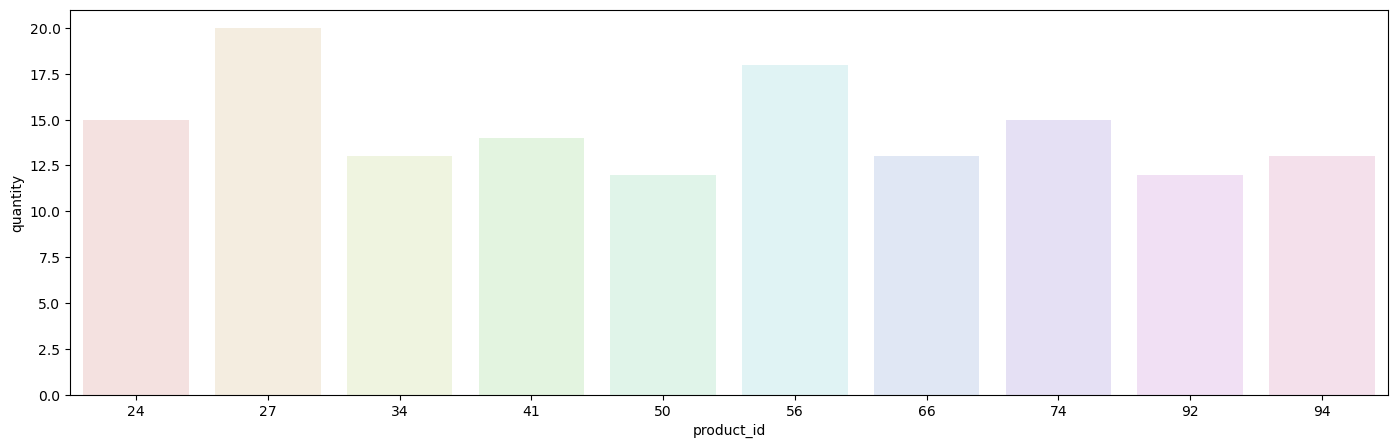

In [129]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.barplot(data=sold, x='product_id', y='quantity', ci=None, palette='hls', alpha=0.2)

Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).

In [131]:
sold_day = data.groupby('date').quantity.agg('sum').sort_values(ascending=False)

<AxesSubplot:xlabel='date', ylabel='quantity'>

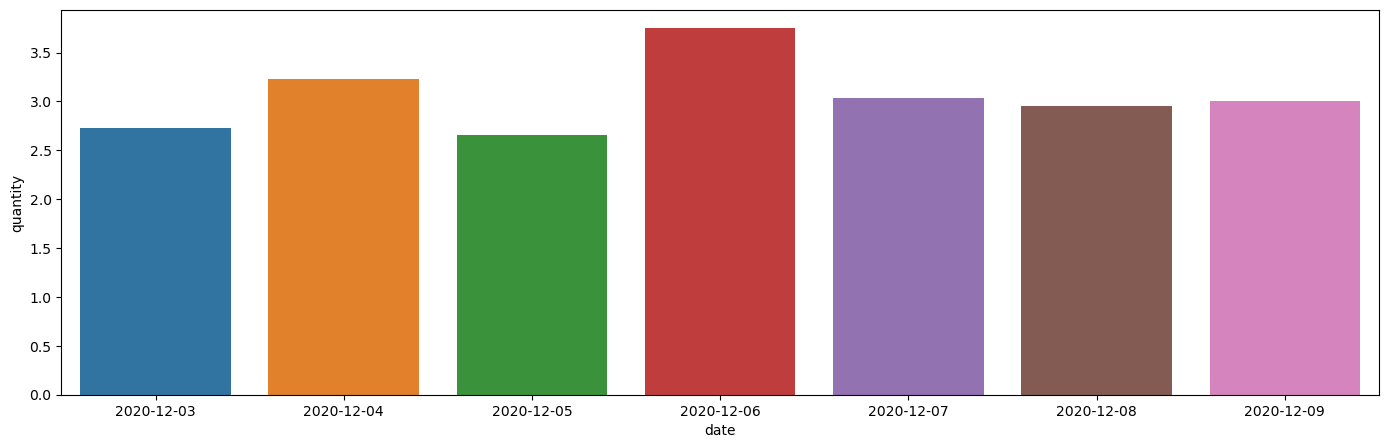

In [133]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.barplot(data=data, x='date', y='quantity', ci=None)

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.
    

product_id quantity name              date

25         2        Katya Skriptsova  2020-12-05

54         1        Olya Silyutina    2020-12-05  

7          4        Katya Skriptsova  2020-12-05 

6          4        Sasha Tsarev      2020-12-06

6          1        Sasha Tsarev      2020-12-06

7          5        Katya Skriptsova  2020-12-06  

In [137]:
products_per_day = data.groupby('date', as_index=False).quantity.sum()

In [138]:
products_per_day

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


<AxesSubplot:xlabel='date', ylabel='quantity'>

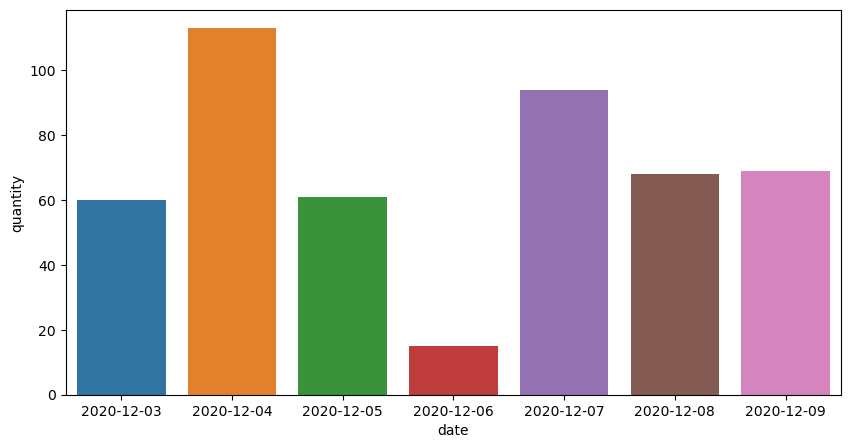

In [140]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=products_per_day, x='date', y='quantity')

Небольшой минипроект на фильтрацию данных.

Имеется таблица с записями о компаниях, включая их ИНН, и отдельный текстовый файл с набором ИНН (колонка head_inn), которые хранятся в папке 4_inn.

inn.xls — таблица в экселевском формате

necessary_inn.txt — перечень необходимых ИНН в текстовом формате

Задачи:
    
извлечь из таблицы записи с ИНН, указанными в текстовом файле

записать результат в файл selected_inn.csv

В качестве проверки укажите сумму колонки income,RUB в отобранных данных.

### Извлекаю из таблицы записи с ИНН, указанными в текстовом файле

In [143]:
necessary = []

with open('4_necessary_inn.txt') as f:
    for line in f:
        necessary.append(int(line))

In [149]:
data = pd.read_excel('4_inn.xls')

In [150]:
data.head(1)

,Unnamed: 0,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
0,0,0,"ЗАО «Власова, Макаров и Шашков»",1143692580560,"д. Кирово-Чепецк, пр. Металлургов, д. 537 к. 3...",Жданов Карл Виленович,Маммолог,109092209811,+7 (559) 338-87-76,bogdanovavtonom@yahoo.com,ooo.info,2015-01-07,2006-10-04,21112877268,73423615032,Ulan-Ude,"к. Тосно, ул. Пушкинская, д. 896, 617222",Синхронизация критически важных отношений,54875526078,32205872896


In [151]:
data = pd.read_excel('4_inn.xls', index_col='#')

In [153]:
data.head(1)

,Unnamed: 0,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
#,,,,,,,,,,,,,,,,,,,
0,0,"ЗАО «Власова, Макаров и Шашков»",1143692580560,"д. Кирово-Чепецк, пр. Металлургов, д. 537 к. 3...",Жданов Карл Виленович,Маммолог,109092209811,+7 (559) 338-87-76,bogdanovavtonom@yahoo.com,ooo.info,2015-01-07,2006-10-04,21112877268,73423615032,Ulan-Ude,"к. Тосно, ул. Пушкинская, д. 896, 617222",Синхронизация критически важных отношений,54875526078,32205872896


In [154]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [155]:
data.head(1)

,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
#,,,,,,,,,,,,,,,,,,
0,"ЗАО «Власова, Макаров и Шашков»",1143692580560,"д. Кирово-Чепецк, пр. Металлургов, д. 537 к. 3...",Жданов Карл Виленович,Маммолог,109092209811,+7 (559) 338-87-76,bogdanovavtonom@yahoo.com,ooo.info,2015-01-07,2006-10-04,21112877268,73423615032,Ulan-Ude,"к. Тосно, ул. Пушкинская, д. 896, 617222",Синхронизация критически важных отношений,54875526078,32205872896


In [156]:
data.shape

(2110, 18)

In [158]:
data = data.loc[data.head_inn.isin(necessary)]

In [159]:
data.shape

(115, 18)

### Записываю результат в файл selected_inn.csv

In [162]:
data.to_csv('selected_inn.csv', index=False)

### В качестве проверки указываю сумму колонки income,RUB в отобранных данных.

In [161]:
data['income,RUB'].sum()

6104522627393